In [1]:
import os
import utilities as rocku
import matplotlib.pyplot as plt
import numpy as np
import multiprocessing as mp
import timeit
from stitching import Stitcher
from stitching.images import Images
from utilities import plot_image, plot_images
from imgstitch import stitch_images
# from pystackreg import StackReg
import dxchange
from tqdm import tqdm
import cv2 as cv
ncore = mp.cpu_count()
print("CPU cores:", ncore)

CPU cores: 256


In [2]:
# need to change
ipts="33408"
# scan_type = 'ct_scans'
# scan_type = 'radiographs'
scan_type = 'autoreduce/jpeg'
# scan_type = 'analysis'
# scan_type = 'analysis'
####################################
##################################
scan_loc = "/HFIR/CG1D/IPTS-"+ipts+"/shared/" + scan_type
save_loc = "/HFIR/CG1D/IPTS-"+ipts+"/shared/analysis/"
folder_list = os.listdir(scan_loc)
folder_list.sort()
folder_list

['2024_10_15', '2024_10_15_cyl']

In [3]:
sample_name = "2024_10_15"
######################
######################
######################
scan_dir = os.path.join(scan_loc, sample_name)
fname_list = os.listdir(scan_dir)
fname_list.sort()
fname_list

['R1_blk1_1_0060_0138.jpg',
 'R1_blk1_2_0060_0139.jpg',
 'R1_blk1_3_0060_0140.jpg',
 'R1_blk1_4_0060_0141.jpg',
 'R1_blk1_5_0060_0142.jpg',
 'R1_blk1_6_0060_0143.jpg',
 'R1_blk2_1_0060_0144.jpg',
 'R1_blk2_2_0060_0145.jpg',
 'R1_blk2_3_0060_0146.jpg',
 'R1_blk2_4_0060_0147.jpg',
 'R1_blk2_5_0060_0148.jpg',
 'R1_blk2_6_0060_0149.jpg',
 'R2_blk1_1_0060_0126.jpg',
 'R2_blk1_2_0060_0127.jpg',
 'R2_blk1_3_0060_0128.jpg',
 'R2_blk1_4_0060_0129.jpg',
 'R2_blk1_5_0060_0130.jpg',
 'R2_blk1_6_0060_0131.jpg',
 'R2_blk2_1_0060_0132.jpg',
 'R2_blk2_2_0060_0133.jpg',
 'R2_blk2_3_0060_0134.jpg',
 'R2_blk2_4_0060_0135.jpg',
 'R2_blk2_5_0060_0136.jpg',
 'R2_blk2_6_0060_0137.jpg',
 'R3_blk1_1_0060_0114.jpg',
 'R3_blk1_2_0060_0115.jpg',
 'R3_blk1_3_0060_0116.jpg',
 'R3_blk1_4_0060_0117.jpg',
 'R3_blk1_5_0060_0118.jpg',
 'R3_blk1_6_0060_0119.jpg',
 'R3_blk2_1_0060_0120.jpg',
 'R3_blk2_2_0060_0121.jpg',
 'R3_blk2_3_0060_0122.jpg',
 'R3_blk2_4_0060_0123.jpg',
 'R3_blk2_5_0060_0124.jpg',
 'R3_blk2_6_0060_012

In [4]:
to_rmv = [
    # 'Stitched'
]
fname_list = rocku.remove_fnames(fname_list, to_rmv)

97
97


In [5]:
fname_df = rocku.group_fname_df(fname_list, scan_dir)
fname_df

fname   sample position  idx  \
0   R1_blk1_1_0060_0138.jpg  R1_blk1        1  138   
1   R1_blk1_2_0060_0139.jpg  R1_blk1        2  139   
2   R1_blk1_3_0060_0140.jpg  R1_blk1        3  140   
3   R1_blk1_4_0060_0141.jpg  R1_blk1        4  141   
4   R1_blk1_5_0060_0142.jpg  R1_blk1        5  142   
..                      ...      ...      ...  ...   
92  S4_blk2_2_0060_0055.jpg  S4_blk2        2   55   
93  S4_blk2_3_0060_0056.jpg  S4_blk2        3   56   
94  S4_blk2_4_0060_0057.jpg  S4_blk2        4   57   
95  S4_blk2_5_0060_0058.jpg  S4_blk2        5   58   
96  S4_blk2_6_0060_0059.jpg  S4_blk2        6   59   

                                                fpath  
0   /HFIR/CG1D/IPTS-33408/shared/autoreduce/jpeg/2...  
1   /HFIR/CG1D/IPTS-33408/shared/autoreduce/jpeg/2...  
2   /HFIR/CG1D/IPTS-33408/shared/autoreduce/jpeg/2...  
3   /HFIR/CG1D/IPTS-33408/shared/autoreduce/jpeg/2...  
4   /HFIR/CG1D/IPTS-33408/shared/autoreduce/jpeg/2...  
..                                                ...  
92  /HFIR/CG1D/IPTS-33408/shared/autoreduce/jpeg/2...  
93  /HFIR/CG1D/IPTS-33408/shared/autoreduce/jpeg/2...  
94  /HFIR/CG1D/IPTS-33408/shared/autoreduce/jpeg/2...  
95  /HFIR/CG1D/IPTS-33408/shared/autoreduce/jpeg/2...  
96  /HFIR/CG1D/IPTS-33408/shared/autoreduce/jpeg/2...  

[97 rows x 5 columns]

In [6]:
sample_list = sorted(list(set(fname_df['sample'])))
sample_list

['R1_blk1',
 'R1_blk2',
 'R2_blk1',
 'R2_blk2',
 'R3_blk1',
 'R3_blk2',
 'R4_blk1',
 'R4_blk2',
 'S1_blk1',
 'S1_blk2',
 'S2_blk1',
 'S2_blk2',
 'S3_blk1',
 'S3_blk2',
 'S4_blk1',
 'S4_blk2']

In [7]:
img_name_list = list(fname_df['fname'][fname_df['sample']==sample_list[0]])
img_name_list

['R1_blk1_1_0060_0138.jpg',
 'R1_blk1_2_0060_0139.jpg',
 'R1_blk1_3_0060_0140.jpg',
 'R1_blk1_4_0060_0141.jpg',
 'R1_blk1_5_0060_0142.jpg',
 'R1_blk1_6_0060_0143.jpg']

In [8]:
img_path_list = list(fname_df['fpath'][fname_df['sample']==sample_list[0]])
img_path_list

['/HFIR/CG1D/IPTS-33408/shared/autoreduce/jpeg/2024_10_15/R1_blk1_1_0060_0138.jpg',
 '/HFIR/CG1D/IPTS-33408/shared/autoreduce/jpeg/2024_10_15/R1_blk1_2_0060_0139.jpg',
 '/HFIR/CG1D/IPTS-33408/shared/autoreduce/jpeg/2024_10_15/R1_blk1_3_0060_0140.jpg',
 '/HFIR/CG1D/IPTS-33408/shared/autoreduce/jpeg/2024_10_15/R1_blk1_4_0060_0141.jpg',
 '/HFIR/CG1D/IPTS-33408/shared/autoreduce/jpeg/2024_10_15/R1_blk1_5_0060_0142.jpg',
 '/HFIR/CG1D/IPTS-33408/shared/autoreduce/jpeg/2024_10_15/R1_blk1_6_0060_0143.jpg']

In [ ]:
# stitch_images(scan_dir, img_name_list[0:2], stitch_direction=1)

In [ ]:
# stitcher = Stitcher()
# stitcher = Stitcher(detector="sift", confidence_threshold=10)
# panorama = stitcher.stitch_verbose(img_path_list)

In [ ]:
# img_stack = rocku.read_img_stack(scan_dir, img_name_list, flipud=False)#.astype(np.float16)

In [ ]:
# img1 = img_stack[0].astype(np.uint8)
# img2 = img_stack[1].astype(np.uint8)

In [ ]:
# # Initialize SIFT detector
# sift = cv2.SIFT_create()

# # Detect keypoints and descriptors
# kp1, des1 = sift.detectAndCompute(img1, None)
# kp2, des2 = sift.detectAndCompute(img2, None)

# # Use BFMatcher to find matches
# bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
# matches = bf.match(des1, des2)

# # Sort matches by distance
# matches = sorted(matches, key=lambda x: x.distance)
# matches

In [10]:
images = Images.of(img_path_list)
medium_imgs = list(images.resize(Images.Resolution.MEDIUM))
low_imgs = list(images.resize(Images.Resolution.LOW))
final_imgs = list(images.resize(Images.Resolution.FINAL))

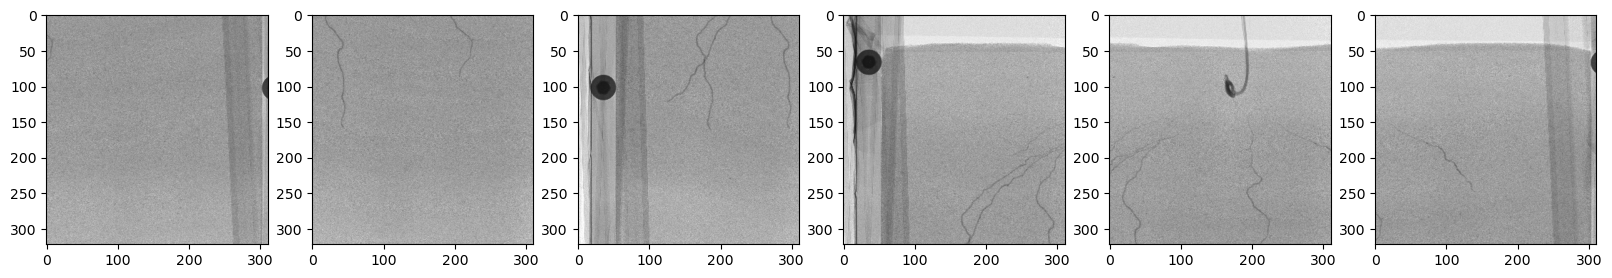

In [11]:
plot_images(low_imgs, (20,20))

In [12]:
original_size = images.sizes[0]
medium_size = images.get_image_size(medium_imgs[0])
low_size = images.get_image_size(low_imgs[0])
final_size = images.get_image_size(final_imgs[0])

print(f"Original Size: {original_size}  -> {'{:,}'.format(np.prod(original_size))} px ~ 1 MP")
print(f"Medium Size:   {medium_size}  -> {'{:,}'.format(np.prod(medium_size))} px ~ 0.6 MP")
print(f"Low Size:      {low_size}   -> {'{:,}'.format(np.prod(low_size))} px ~ 0.1 MP")
print(f"Final Size:    {final_size}  -> {'{:,}'.format(np.prod(final_size))} px ~ 1 MP")

Original Size: (5450, 5650)  -> 30,792,500 px ~ 1 MP
Medium Size:   (761, 789)  -> 600,429 px ~ 0.6 MP
Low Size:      (311, 322)   -> 100,142 px ~ 0.1 MP
Final Size:    (5450, 5650)  -> 30,792,500 px ~ 1 MP


In [21]:
sift = cv.SIFT_create()

In [38]:
# Detect keypoints and descriptors
img1 = low_imgs[1]
img2 = low_imgs[2]
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# Use BFMatcher to find matches
bf = cv.BFMatcher(cv.NORM_L2, crossCheck=True)
matches = bf.match(des1, des2)

# Sort matches by distance
matches = sorted(matches, key=lambda x: x.distance)
matches

[< cv2.DMatch 0x7fdc68782c90>,
 < cv2.DMatch 0x7fdc68783bb0>,
 < cv2.DMatch 0x7fdc687834d0>,
 < cv2.DMatch 0x7fdc68783250>,
 < cv2.DMatch 0x7fdc68783930>,
 < cv2.DMatch 0x7fdc687834f0>,
 < cv2.DMatch 0x7fdc68783e50>,
 < cv2.DMatch 0x7fdc687835f0>,
 < cv2.DMatch 0x7fdc68783bf0>,
 < cv2.DMatch 0x7fdc68783530>]

In [39]:
# Extract location of good matches
src_pts = np.float32([kp1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
dst_pts = np.float32([kp2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)

# Compute homography
H, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC, 5.0)
H

array([[-1.51164254e+01,  4.14132613e+00,  4.69663435e+02],
       [-2.05849205e+00,  9.67744936e-01,  4.96336484e+01],
       [-2.96423092e-02,  1.06730455e-02,  1.00000000e+00]])

In [41]:
# Get the dimensions of the images
h1, w1 = img1.shape[:2]
h2, w2 = img2.shape[:2]

# Get the canvas dimesions
pts = np.float32([[0, 0], [0, h1], [w1, h1], [w1, 0]]).reshape(-1, 1, 2)
dst = cv.perspectiveTransform(pts, H)
img2_warped = cv.warpPerspective(img2, H, (w1 + w2, h1))

# Place the first image on the canvas
img2_warped[0:h1, 0:w1] = img1

In [ ]:
# Simple blending technique
result = img2_warped

cv.imshow('Result', result)
cv.waitKey(0)
cv.destroyAllWindows()


In [29]:
# Apply ratio test
good = []
for m in matches:
    if m[0].distance < 0.5*m[1].distance:
        good.append(m)
matches = np.asarray(good)
matches

TypeError: 'cv2.DMatch' object is not subscriptable

In [27]:
img_matches = cv.drawMatches(
    low_imgs[1], kp1, low_imgs[2], kp2, matches[:50], None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
cv_imshow(img_matches)
cv.waitKey(0)
cv.destroyAllWindows()

NameError: name 'cv_imshow' is not defined

In [20]:
cv.detail.computeImageFeatures()

<function computeImageFeatures>

In [17]:
from stitching.feature_detector import FeatureDetector

finder = FeatureDetector()
features = [finder.detect_features(img) for img in low_imgs]
keypoints_center_img = finder.draw_keypoints(low_imgs[1], features[1])

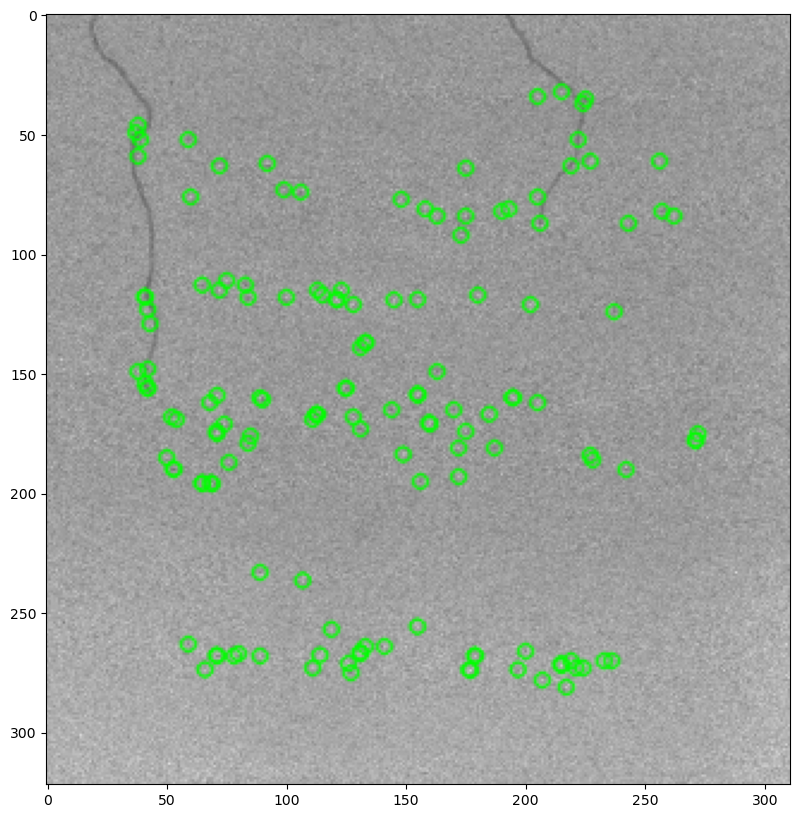

In [18]:
plot_image(keypoints_center_img, (15,10))

In [35]:
stitcher = Stitcher(detector="sift", confidence_threshold=0.3, )
panorama = stitcher.stitch_verbose(list(img_stack))

error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/resize.cpp:3929: error: (-215:Assertion failed) func != 0 in function 'resize'


In [27]:
# img_stack = rocku.read_img_stack(scan_dir, fname_list, flipud=False)
trans_algo_dict = {
    'TRANSLATION': StackReg.TRANSLATION,
    'RIGID_BODY': StackReg.RIGID_BODY,
    'SCALED_ROTATION': StackReg.SCALED_ROTATION,
    'AFFINE': StackReg.AFFINE,
    'BILINEAR': StackReg.BILINEAR
}

Text(0.5, 1.0, 'last/first')

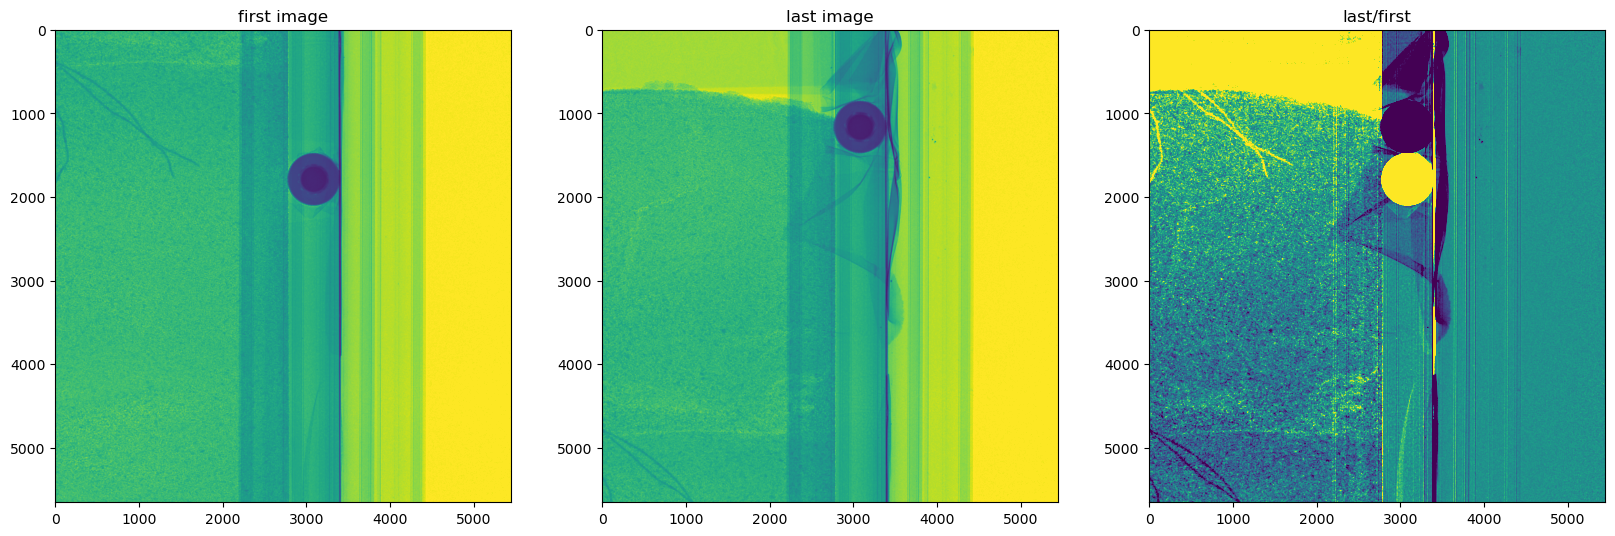

In [28]:
f, ax = plt.subplots(1, 3, figsize=(20, 20))
ax[0].imshow(img_stack[0], vmin=0, vmax=1)
ax[0].set_title('first image')

ax[1].imshow(img_stack[-1], vmin=0, vmax=1)
ax[1].set_title('last image')

ax[2].imshow(np.divide(img_stack[-1], img_stack[0]), vmin=0.8, vmax=1.2)
ax[2].set_title('last/first')

Text(0.5, 1.0, 'last/first')

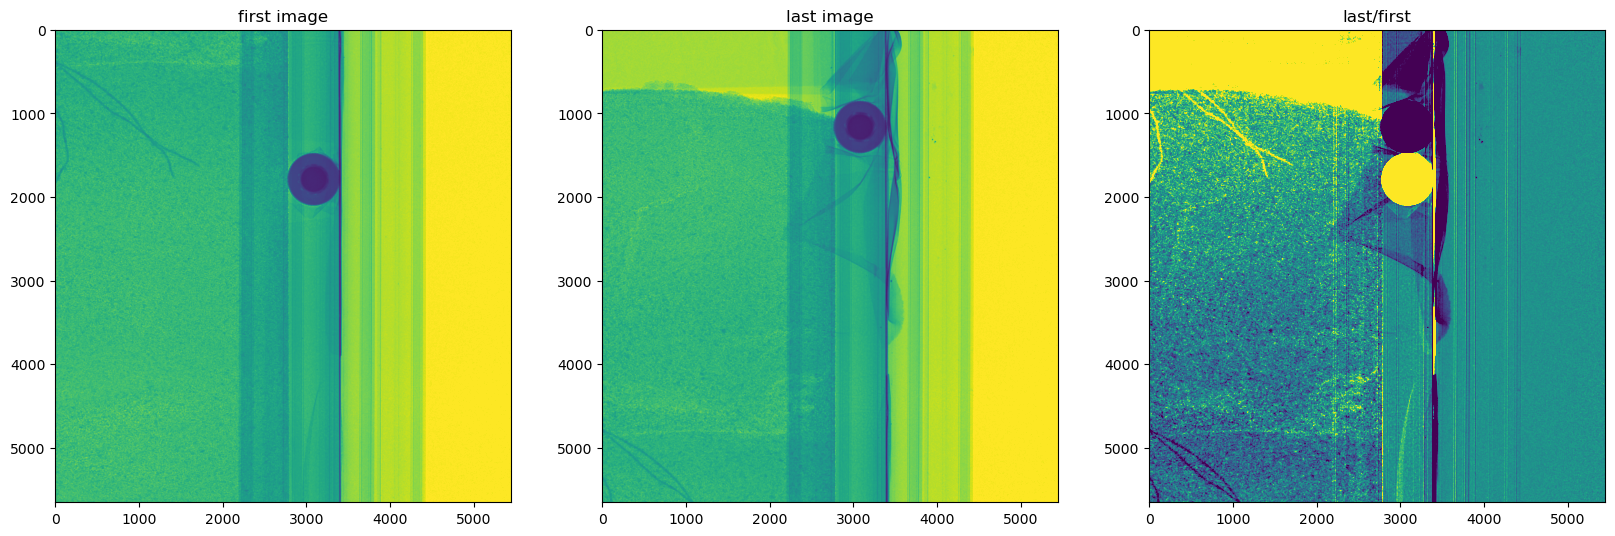

In [29]:
# roi = True
roi = False
roi_left = 0
roi_right = -1
roi_top = 0
roi_bottom = 3300
# roi_left = 250
# roi_right = 1350
# roi_top = 900
# roi_bottom = 1350
#########################
#########################
img_stack_roi = rocku.crop(img_stack, roi_left, roi_right, roi_top, roi_bottom, roi)
f, ax = plt.subplots(1, 3, figsize=(20, 20))
ax[0].imshow(img_stack_roi[0], vmin=0, vmax=1)
ax[0].set_title('first image')

ax[1].imshow(img_stack_roi[-1], vmin=0, vmax=1)
ax[1].set_title('last image')

ax[2].imshow(np.divide(img_stack_roi[-1], img_stack_roi[0]), vmin=0.8, vmax=1.2)
ax[2].set_title('last/first')

In [54]:
pixel_bin_size = 1
# pixel_bin_size = 2
func = np.sum
# dtype = np.float16
dtype = np.float32
# dtype = np.float64
#################################################
t0 = timeit.default_timer()
img_stack_resized = rocku.bin_pix(img_stack_roi, pixel_bin_size=pixel_bin_size, func=func, dtype=dtype)
t1 = timeit.default_timer()
print("Time: {} s".format(t1-t0))

Pixel_bin_size = 1, no binning
Time: 0.009642348624765873 s


In [55]:
perform_reg = False
# perform_reg = True
trans_algo = 'RIGID_BODY'
# trans_algo = 'TRANSLATION'
# reference = 'previous'
reference = 'first'
#################################################
sr = StackReg(trans_algo_dict[trans_algo])
if pixel_bin_size == 1:
    if perform_reg:
        reg_stack_roi = sr.register_transform_stack(img_stack_roi, reference=reference, verbose=True)#, progress_callback=rocku.show_progress)
    else:
        reg_stack_roi = img_stack_roi[:]
else:
    if perform_reg:
        reg_stack_roi = sr.register_transform_stack(img_stack_resized, reference=reference, verbose=True)#, progress_callback=rocku.show_progress)
    else:
        reg_stack_roi = img_stack_resized[:]
# reg_stack_roi_prev = sr.register_transform_stack(img_stack_roi, reference='previous', verbose=True)#, progress_callback=rocku.show_progress)
# reg_stack_roi_avg = sr.register_transform_stack(img_stack_roi, reference='mean', verbose=True)#, progress_callback=rocku.show_progress)
# reg_stack_roi_1st = sr.register_transform_stack(img_stack_roi, reference='first', n_frames=1, verbose=True)#, progress_callback=rocku.show_progress)
# reg_stack_roi_1st10 = sr.register_transform_stack(img_stack_roi, reference='first', n_frames=10, verbose=True)#, progress_callback=rocku.show_progress)
# reg_stack_roi_1st10mov = sr.register_transform_stack(img_stack_roi, reference='first', n_frames=10, moving_average=10, verbose=True)#, progress_callback=rocku.show_progress)

/tmp/ipykernel_3802343/1419280919.py:13: RuntimeWarning: divide by zero encountered in divide
  ax[1].imshow(np.divide(img_stack_roi[mov_idx], img_stack_roi[ref_idx]), vmin=0.8, vmax=1.2)
/tmp/ipykernel_3802343/1419280919.py:16: RuntimeWarning: divide by zero encountered in divide
  ax[2].imshow(np.divide(reg_check[mov_idx], reg_check[ref_idx]), vmin=0.8, vmax=1.2)


Text(0.5, 1.0, 'diff of registered')

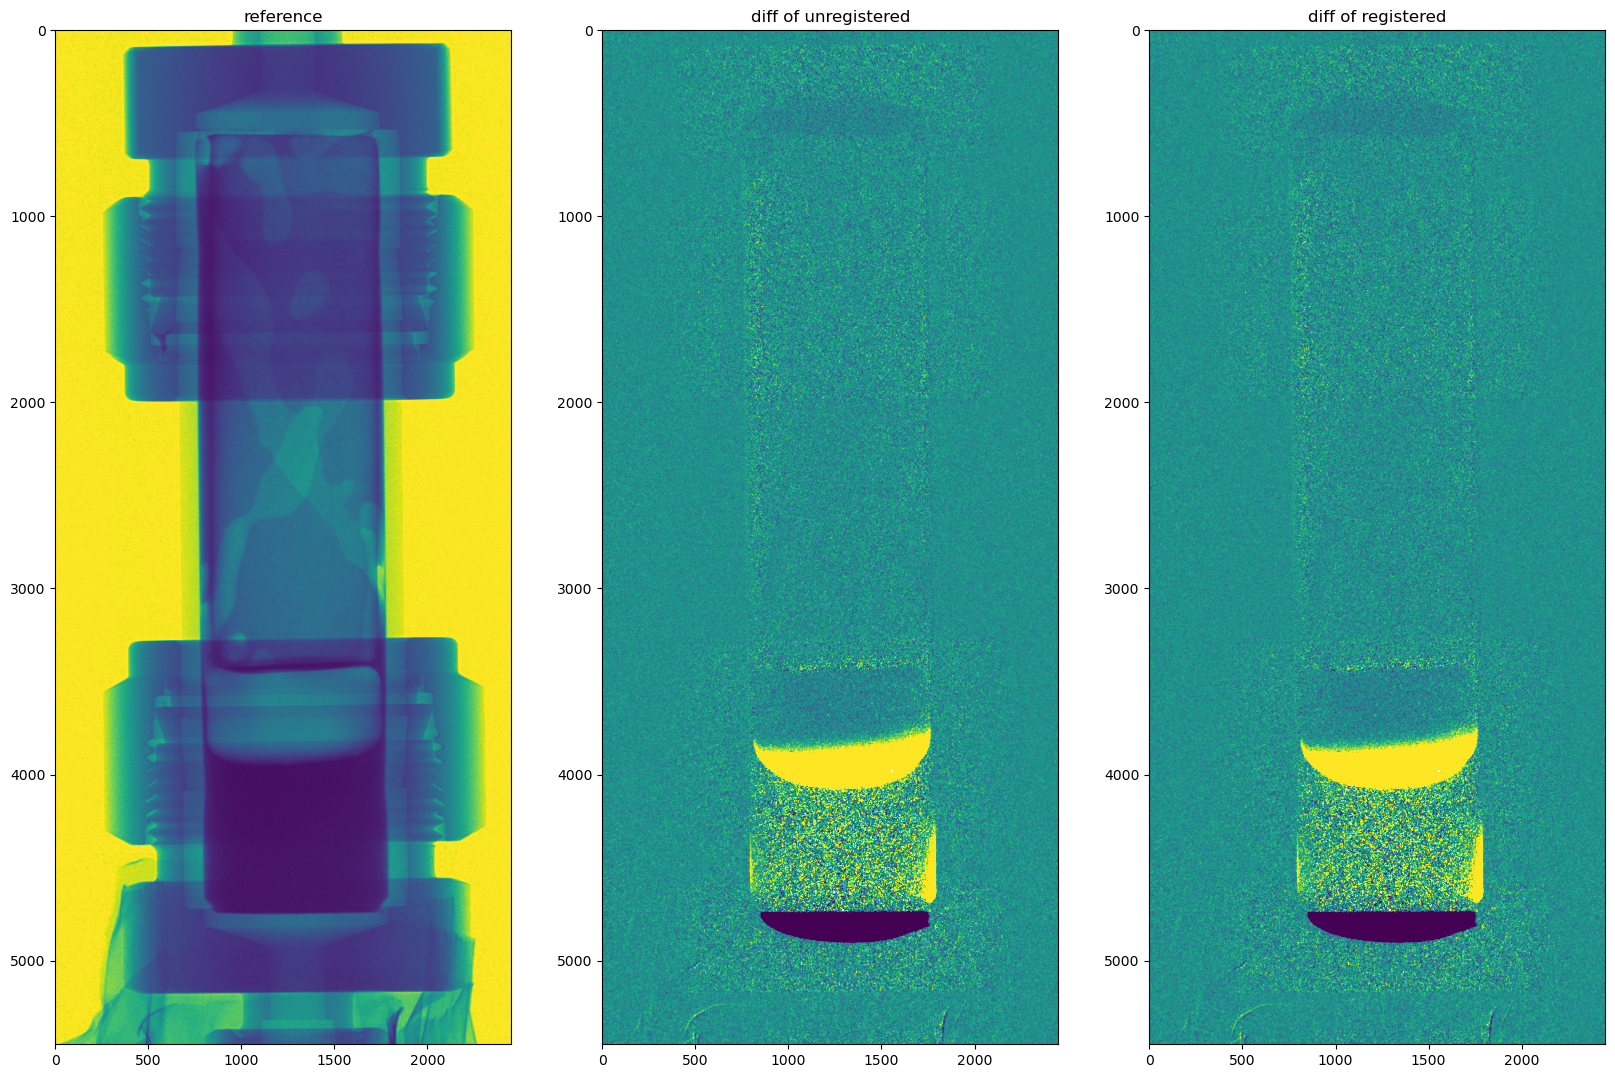

In [56]:
# print(ref_roi.shape)
ref_idx = 0
mov_idx = -1
reg_check = reg_stack_roi[:]
# if rescale_factor != 1:
#     ref_roi = ski.transform.rescale(ref_roi, rescale_factor)
#     mov_roi = ski.transform.rescale(mov_roi, rescale_factor)
#     print(ref_roi.shape)
f, ax = plt.subplots(1, 3, figsize=(20, 20))
ax[0].imshow(img_stack_roi[ref_idx], vmin=0, vmax=1)
ax[0].set_title('reference')

ax[1].imshow(np.divide(img_stack_roi[mov_idx], img_stack_roi[ref_idx]), vmin=0.8, vmax=1.2)
ax[1].set_title('diff of unregistered')

ax[2].imshow(np.divide(reg_check[mov_idx], reg_check[ref_idx]), vmin=0.8, vmax=1.2)
ax[2].set_title('diff of registered')

In [58]:
reg_ratio = np.divide(reg_stack_roi, np.mean(reg_stack_roi[0:4,:,:], axis=0))

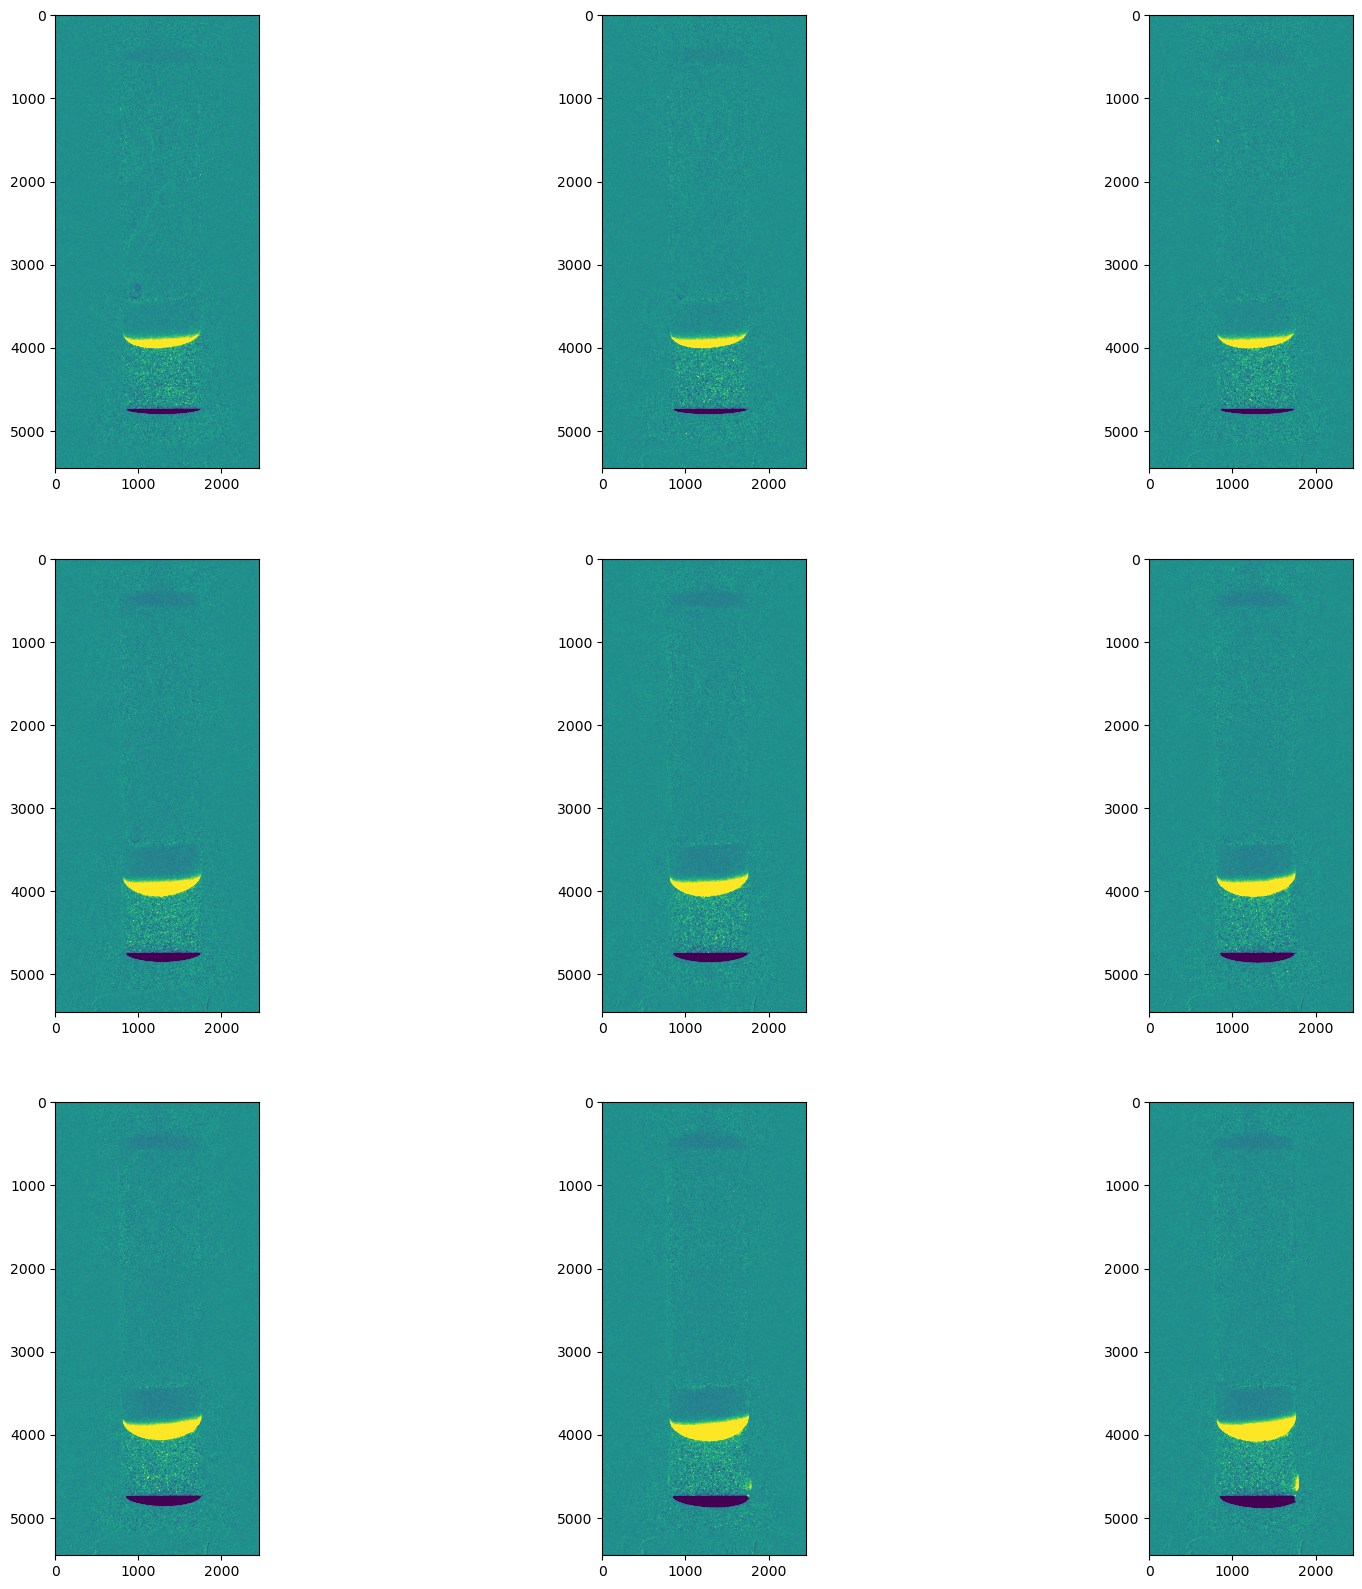

In [59]:
f, ax = plt.subplots(3, 3, figsize=(20, 20))

ax[0][0].imshow(reg_ratio[10], vmin=0.8, vmax=1.2)
ax[0][1].imshow(reg_ratio[30], vmin=0.8, vmax=1.2)
ax[0][2].imshow(reg_ratio[50], vmin=0.8, vmax=1.2)

ax[1][0].imshow(reg_ratio[80], vmin=0.8, vmax=1.2)
ax[1][1].imshow(reg_ratio[100], vmin=0.8, vmax=1.2)
ax[1][2].imshow(reg_ratio[120], vmin=0.8, vmax=1.2)

ax[2][0].imshow(reg_ratio[140], vmin=0.8, vmax=1.2)
ax[2][1].imshow(reg_ratio[160], vmin=0.8, vmax=1.2)
ax[2][2].imshow(reg_ratio[170], vmin=0.8, vmax=1.2)

# Crop

Cropped:


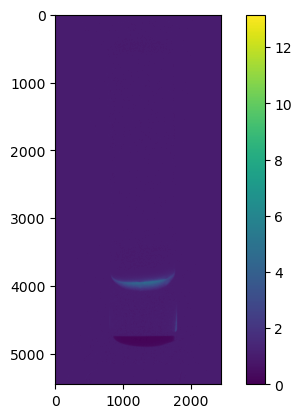

In [60]:
###################### need to change start
crop = False
# crop_left = 250
# crop_right = 1650
# crop_top = 750
# crop_bottom = 1950
crop_left = 450
crop_right = 1200
crop_top = 1750#530
crop_bottom = 2190
###################### need to change end
reg_ratio_out = rocku.crop(reg_ratio, crop_left, crop_right, crop_top, crop_bottom, crop)

print("Cropped:")
plt.imshow(reg_ratio_out[-1])
plt.colorbar()
plt.show()

# Save files

In [61]:
save_to = save_loc + sample_name + "_" + trans_algo# + "_roi"
save_to_norm = save_to + '/normalized'
save_to_ratio = save_to + '/ratio'

if crop:
    reg_stack_subdir = save_to_norm + "/full"
    reg_ratio_subdir = save_to_ratio + "/full"
    reg_stack_crop_subdir = save_to_norm + "/crop"
    reg_ratio_crop_subdir = save_to_ratio + "/crop"
else:
    reg_stack_subdir = save_to_norm
    reg_ratio_subdir = save_to_ratio

reg_stack_out = reg_stack_roi
reg_stack_crop_out = rocku.crop(reg_stack_roi, crop_left, crop_right, crop_top, crop_bottom, crop)
###############################
###############################
if not os.path.exists(save_to):
    os.mkdir(save_to)
if not os.path.exists(save_to_norm):
    os.mkdir(save_to_norm)
if not os.path.exists(save_to_ratio):
    os.mkdir(save_to_ratio)
if not os.path.exists(reg_stack_subdir):
    os.mkdir(reg_stack_subdir)
if not os.path.exists(reg_ratio_subdir):
    os.mkdir(reg_ratio_subdir)
print("Saving to '{}' ...".format(reg_stack_subdir))
print("Saving to '{}' ...".format(reg_ratio_subdir))
for i, e_name in tqdm(enumerate(fname_list)):
    img_pl = Image.fromarray(reg_stack_out[i])
    img_pl.save(reg_stack_subdir + "/" + e_name)
    img_pl_ratio = Image.fromarray(reg_ratio[i])
    img_pl_ratio.save(reg_ratio_subdir + "/" + e_name)
    if crop:
        if not os.path.exists(reg_stack_crop_subdir):
            os.mkdir(reg_stack_crop_subdir)
        if not os.path.exists(reg_ratio_crop_subdir):
            os.mkdir(reg_ratio_crop_subdir)
        img_pl_crop = Image.fromarray(reg_stack_crop_out[i])
        img_pl_crop.save(reg_stack_crop_subdir + "/" + e_name)
        img_pl_ratio_crop = Image.fromarray(reg_ratio_out[i])
        img_pl_ratio_crop.save(reg_ratio_crop_subdir + "/" + e_name)
    

Saving to '/HFIR/CG1D/IPTS-33285/shared/analysis/2024_09_26_AG2_RIGID_BODY/normalized' ...
Saving to '/HFIR/CG1D/IPTS-33285/shared/analysis/2024_09_26_AG2_RIGID_BODY/ratio' ...


250it [00:56,  4.41it/s]
